In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from pandas import read_csv
filename = 'Heart.csv'
data_heart = read_csv(filename)


In [2]:
data_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Check for missing values

In [3]:
n_miss=data_heart.isnull().sum()        
for col in range(data_heart.shape[1]):       
    print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))

Column 0 has 0 missing values.
Column 1 has 0 missing values.
Column 2 has 0 missing values.
Column 3 has 0 missing values.
Column 4 has 0 missing values.
Column 5 has 0 missing values.
Column 6 has 0 missing values.
Column 7 has 0 missing values.
Column 8 has 0 missing values.
Column 9 has 0 missing values.
Column 10 has 0 missing values.
Column 11 has 0 missing values.
Column 12 has 0 missing values.
Column 13 has 0 missing values.


# Descriptive statistics

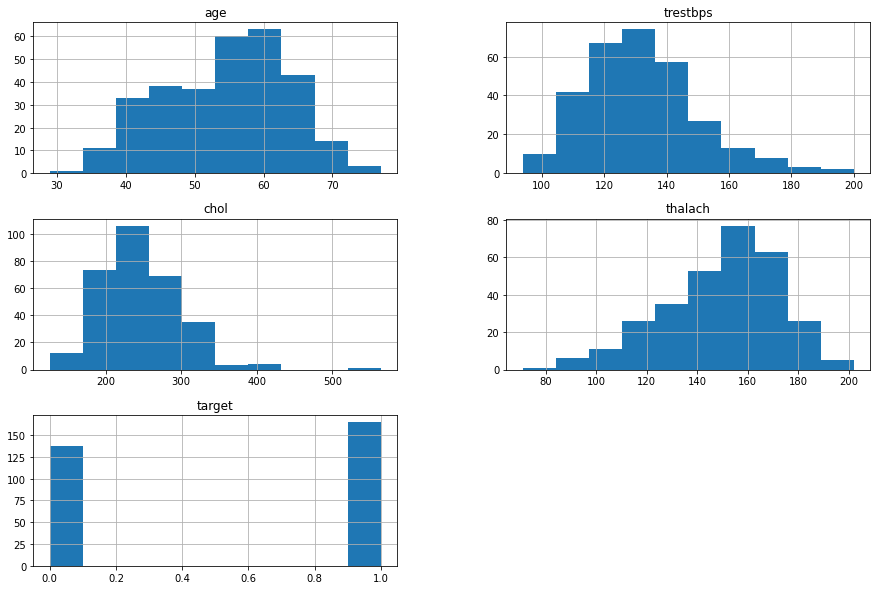

In [4]:
df1 = data_heart[['age','trestbps','chol', 'thalach', 'target']]
df1.hist(figsize=(15, 10))
plt.show()

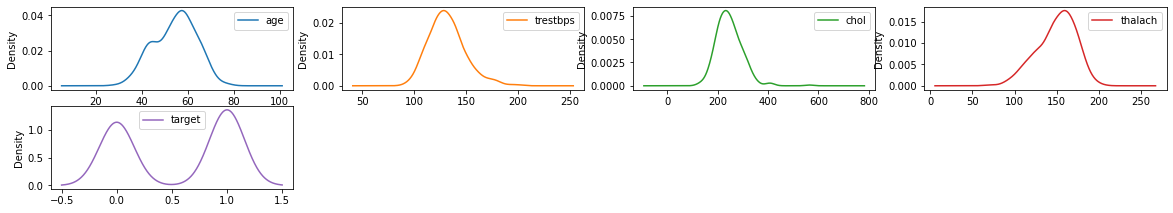

In [5]:
df1.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(20,7))
plt.show()

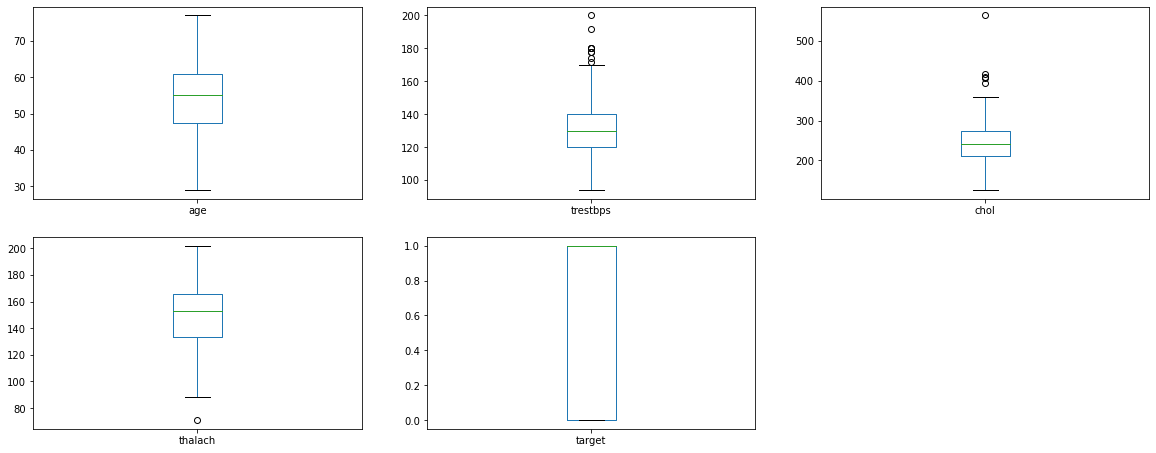

In [6]:
df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,12))
plt.show()

<AxesSubplot:title={'center':'thalach'}, xlabel='target'>

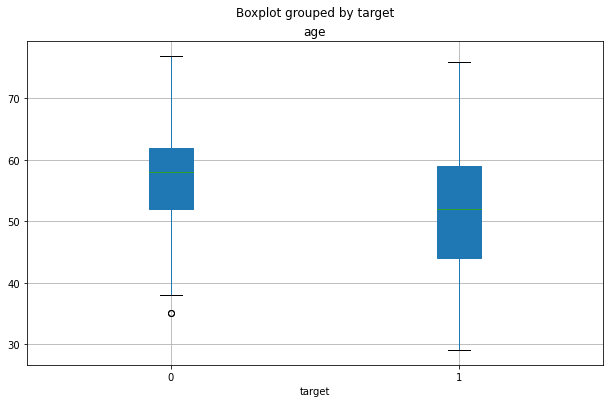

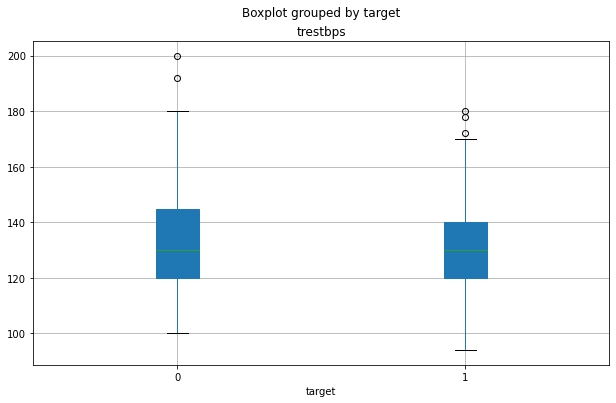

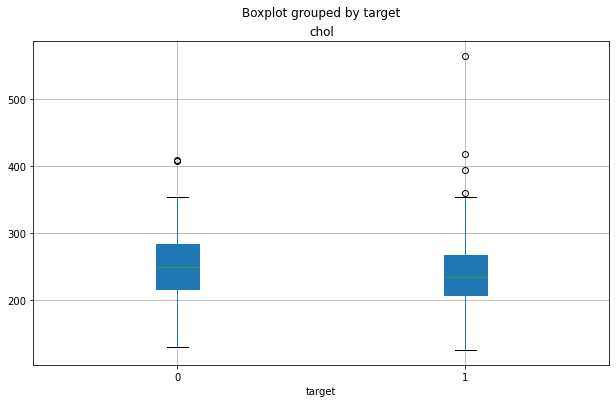

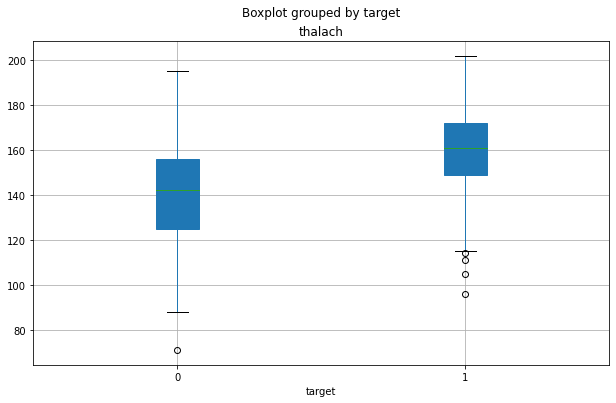

In [7]:
df1.boxplot(column=['age'], by = 'target', figsize=(10,6), patch_artist = True)
df1.boxplot(column=['trestbps'], by = 'target',figsize=(10,6),patch_artist = True)
df1.boxplot(column=['chol'], by = 'target',figsize=(10,6),patch_artist = True) 
df1.boxplot(column=['thalach'], by = 'target',figsize=(10,6),patch_artist = True)

# Pre-processing

In [8]:
last_column = len(data_heart.columns) - 1
y=data_heart.iloc[:,last_column]
X=data_heart.drop(data_heart.columns[-1],axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


scaled_svc = make_pipeline(StandardScaler(), SVC())
print(np.mean(cross_val_score(SVC(), X_train, y_train, cv=10)))
print(np.mean(cross_val_score(scaled_svc, X_train, y_train, cv=10)))

0.6523715415019763
0.8069169960474308


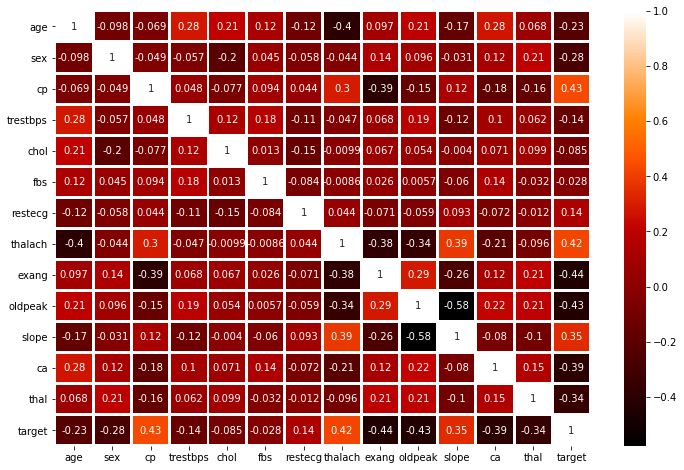

In [11]:
import seaborn as sns

plt.figure(figsize=(12,8)) 
sns.heatmap(data_heart.corr(), annot=True, cmap='gist_heat', linewidths = 2)
plt.show()

# Random forest

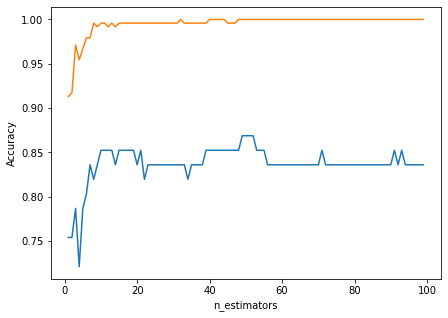

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

estimator_range = range(1, 100, 1)

train_score = []
test_score = []

rf_class = RandomForestClassifier(max_features='auto',warm_start=True, random_state=42)
for estimator in estimator_range:
    rf_class.n_estimators = estimator
    rf_class.fit(X_train,y_train)
    train_score.append(rf_class.score(X_train,y_train))
    test_score.append(rf_class.score(X_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(estimator_range,test_score)
plt.plot(estimator_range,train_score)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [25]:
err, num_est = sorted(zip(test_score, estimator_range))[-1]
print('Accuracy is {} and its corresponding number of estimators is {}.'.format(err, num_est))

Accuracy is 0.8688524590163934 and its corresponding number of estimators is 52.


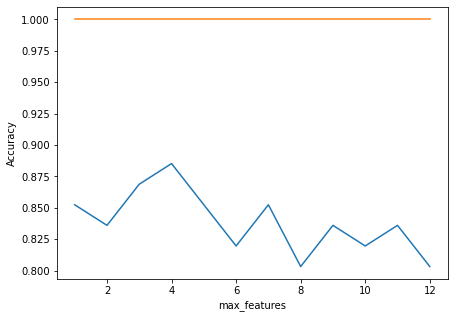

In [14]:
feature_range = range(1, X_train.shape[1])
train_score_feat = []
test_score_feat = []
oob_score = []
for feature in feature_range:
    rf_class = RandomForestClassifier(n_estimators=num_est,max_features=feature,oob_score=True, random_state=42)
    rf_class.fit(X_train,y_train)
    train_score_feat.append(rf_class.score(X_train,y_train))
    test_score_feat.append(rf_class.score(X_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(feature_range,test_score_feat)
plt.plot(feature_range,train_score_feat)
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [26]:
err_feat, max_feat= sorted(zip(test_score_feat, feature_range))[-1]
print('Accuracy is {} and its corresponding maximum number of features is {}.'.format(err_feat, max_feat))

Accuracy is 0.8852459016393442 and its corresponding maximum number of features is 4.


In [16]:
rf_class = RandomForestClassifier(n_estimators=num_est, max_features=max_feat, random_state=42)
rf_class.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=52, random_state=42)

In [17]:
feature_cols = X.columns
feat_imp = pd.DataFrame({'feature':feature_cols, 'importance':rf_class.feature_importances_}).sort_values('importance', ascending=False)

In [18]:
feat_imp

,feature,importance
2,cp,0.135921
9,oldpeak,0.127823
11,ca,0.115086
7,thalach,0.106191
12,thal,0.091653
0,age,0.088715
8,exang,0.082296
4,chol,0.074642
3,trestbps,0.068153
10,slope,0.047992


# Model Evaluation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = data_heart.loc[:, data_heart.columns != 'target']
y = data_heart.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

y_pred_train = svm_clf.predict(X_train)
y_pred_test = svm_clf.predict(X_test)

In [20]:
from sklearn import metrics

# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print('Train accuracy:{}'.format(train_acc))
print('Test accuracy:{}'.format(test_acc))

Train accuracy:0.6519823788546255
Test accuracy:0.6973684210526315


In [21]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print('Train confusion matrix:{}'.format(cm_train))
print('Test confusion matrix:{}'.format(cm_test))

Train confusion matrix:[[ 42  61]
 [ 18 106]]
Test confusion matrix:[[16 19]
 [ 4 37]]


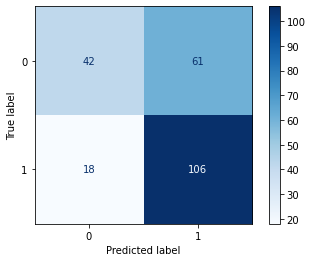

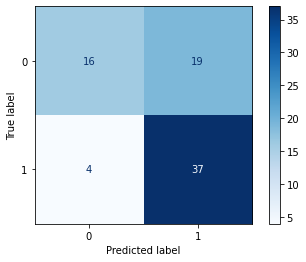

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_train, y_train, cmap=plt.cm.Blues) 
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Blues) 
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.66      0.90      0.76        41

    accuracy                           0.70        76
   macro avg       0.73      0.68      0.67        76
weighted avg       0.72      0.70      0.68        76



AUC: 0.848780487804878


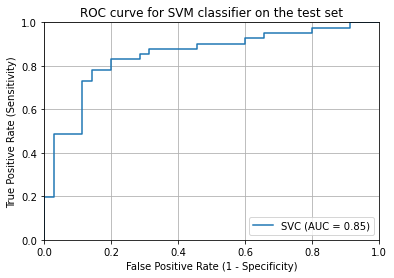

In [24]:
from sklearn.metrics import roc_curve
y_pred_prob_test = svm_clf.predict_proba(X_test)[:, 1]
metrics.plot_roc_curve(svm_clf, X_test, y_test) 

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVM classifier on the test set')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_test, y_pred_prob_test)
print("AUC: {}".format(auc_test))